# PART A (pre-processing)

### Load dataset and  split into train/dev/test
* Download the dataset from tensorflow 
* select only the digits 5, 6 using the proper filter.

In [470]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

%matplotlib inline

In [471]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

train_filter = np.isin(y_train, [5, 6])
test_filter = np.isin(y_test, [5, 6])

X_train, y_train = X_train[train_filter], y_train[train_filter]
X_test, y_test = X_test[test_filter], y_test[test_filter]

In [472]:
print("x_train shape =", X_train.shape)
print("y_train shape =", y_train.shape)
print()
print("x_test shape =", X_test.shape)
print("y_test shape =", y_test.shape)

x_train shape = (11339, 28, 28)
y_train shape = (11339,)

x_test shape = (1850, 28, 28)
y_test shape = (1850,)


Split the train dataset into train and dev, using 80% and 20% of initial dataset, respectively 

In [473]:
from sklearn.model_selection import train_test_split
X_train, X_dev, y_train, y_dev = train_test_split( X_train, y_train, test_size=0.2, random_state=42)

In [474]:
print("X_train shape =", X_train.shape)
print("y_train shape =", y_train.shape)
print()
print("X_dev shape =", X_dev.shape)
print("y_dev shape =", y_dev.shape)
print()
print("X_test shape =", X_test.shape)
print("y_test shape =", y_test.shape)

X_train shape = (9071, 28, 28)
y_train shape = (9071,)

X_dev shape = (2268, 28, 28)
y_dev shape = (2268,)

X_test shape = (1850, 28, 28)
y_test shape = (1850,)


### Visualize some digits

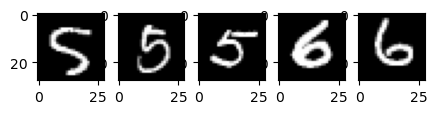

In [475]:
import random
random.seed(1)

plt.figure(figsize=(5,2))
plt.gray()

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train[random.randint(0, X_train.shape[0])])

plt.show()

### Process datasets
Reshape dimensionalities of each training/dev/test example to a vector of 784 dimensions



In [476]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_dev = X_dev.reshape(X_dev.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [477]:
print("x_train shape =", X_train.shape)
print("x_dev shape =", X_dev.shape)
print("x_test shape =", X_test.shape)

x_train shape = (9071, 784)
x_dev shape = (2268, 784)
x_test shape = (1850, 784)


Convert each vector element into a real number between [0, 1]

In [478]:
X_train = X_train / 255.0
X_dev = X_dev / 255.0
X_test = X_test / 255.0

Convert y_train / y_dev / y_test datasets as:
* if class is 5 (digit 5) convert to 0
* if class is 6 (digit 6) convert to 1

This will help us at optimizer implemantation.

In [479]:
y_train = (y_train == 6).astype(int)
y_dev = (y_dev == 6).astype(int)
y_test = (y_test == 6).astype(int)

# PART B (Logistic Regression)

### Sigmoid Function

In [480]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

### computeCostGrads

function that computes and returns:

* **cost J**
* **gradients**,

***without*** using L2 regularization

In [213]:
def computeCostGrads(X, y, w, b, _lambda=0.):
    y_hat = sigmoid(np.dot(X, w) + b)
    m = X.shape[0]
    
    cost = (np.dot(y.T, np.log(y_hat)) + np.dot(y.T, np.log(1 - y_hat)))
    dw = np.dot(X.T, y - y_hat)
    db = np.sum(y - y_hat)
    
    if(_lambda != 0.):
        cost -= (_lambda / 2.0) * np.sum(w**2)
        regularization_term = _lambda * w
        dw -= regularization_term
        
    dw /= m
    db /= m
    
    grads = {"dw": dw, "db": db}
    
    return cost, grads

### Logistic Regression Algorithm

In [220]:
def LogisticRegression(X, y, X_pred=None, y_pred=None, epochs = 200, alpha = 0.05, _lambda = 0.1):
    
    m, n = X.shape
    b = 0
    w = np.zeros(n).reshape((-1,1))
    J = np.zeros(epochs)
    train_accuracy_per_epoch = np.zeros(epochs)
    test_accuracy_per_epoch = np.zeros(epochs)
    
    for epoch in tqdm(range(epochs)):
        cost, grads = computeCostGrads(X, y, w, b, _lambda)
        
        J[epoch] = cost
        
        w += alpha * grads["dw"]
        b += alpha * grads["db"]
        
        
        current_epoch_preds = predict(w, b, X_pred)
        test_accuracy_per_epoch[epoch] = sum(current_epoch_preds == y_pred) / y_pred.shape[0] 
        current_epoch_preds = predict(w, b, X)
        train_accuracy_per_epoch[epoch] = sum(current_epoch_preds == y.reshape(-1)) / y.shape[0]
        
    return J, w, b, train_accuracy_per_epoch, test_accuracy_per_epoch

### Predict

In [221]:
def predict(w, b, X):
    
    predictions = sigmoid(np.dot(X, w) + b)
    predictions = (predictions >= (0.5 + 1e-6)).astype(int)
    
    return predictions.reshape(-1)

In [226]:
J, w, b, train_acc, test_acc = LogisticRegression(X_train, y_train.reshape((-1,1)), epochs = 1000, X_pred=X_test, y_pred=y_test)
predictions = predict(w, b, X_test)

accuracy = sum(predictions == y_test) / y_test.shape[0]
accuracy  = f'{accuracy:.3f}'
accuracy

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:30<00:00,  4.74it/s]


'0.979'

In [223]:
predictions = predict(w, b, X_train)

accuracy = sum(predictions == y_train) / y_train.shape[0]
accuracy  = f'{accuracy:.3f}'
accuracy

'0.966'

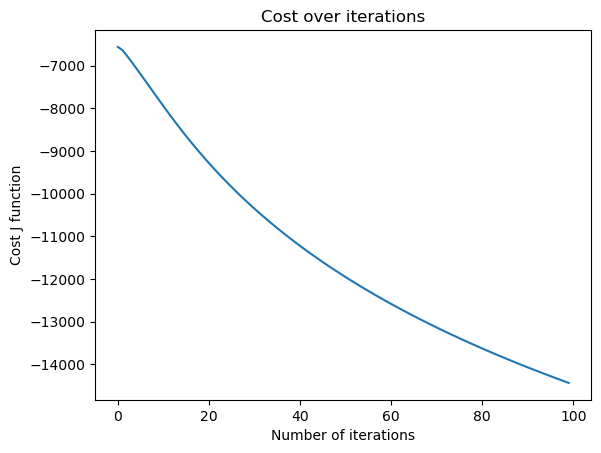

In [224]:
plt.plot(np.arange(J.shape[0]), J)
plt.title("Cost over iterations")
plt.xlabel("Number of iterations")
plt.ylabel("Cost J function")
plt.show()


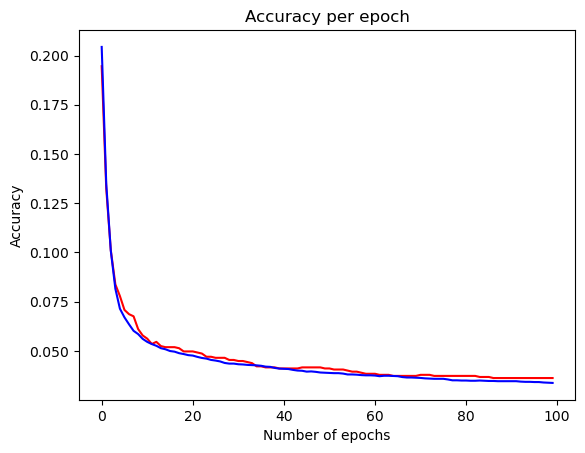

In [225]:
plt.plot(np.arange(test_acc.shape[0]), 1-test_acc, c ='r')
plt.plot(np.arange(train_acc.shape[0]),1- train_acc, c ='b')
plt.title("Accuracy per epoch")
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.show()

### Use L2 Regularization Term

Instead of choosing 100 values for l2 regularization term uniformly in the range [$10^{-4}$ - $10^1$], we choose values uniformly in the below ranges:
* [$10^{-4}$ - $10^{-3}$]
* [$10^{-3}$ - $10^{-2}$]
* [$10^{-2}$ - $10^{-1}$]
* [$10^{-1}$ - $10^0$]
* [$10^0$ - $10^1$]

In [49]:
random.seed(10)
lambdas = np.zeros(50)
for i in range (lambdas.shape[0]):
    lambdas[i] = 10**(-5*random.random()) * 10

In [50]:
random.seed(10)
alphas = np.zeros(20)
for i in range (alphas.shape[0]):
    alphas[i] = 10**(-4*random.random())

In [ ]:
best_w = []
best_b = 0
best_accuracy = 0
best_lambda = 0
best_alpha = 0

i=0

for _lambda in lambdas:
    
    for alpha in tqdm(alphas):
        _, w, b= LogisticRegression(X_train, y_train.reshape((-1,1)), alpha = alpha, epochs=50, _lambda=_lambda)
        predictions = predict(w, b, X_dev)
        accuracy = sum(predictions == y_dev) / y_dev.shape[0]
    
        if accuracy > best_accuracy:
            best_w = w
            best_b = b
            best_accuracy = accuracy
            best_lambda =  _lambda
            best_alpha = alpha
    
    print(i)
    i+=1


# PART C (Neural Netwroks)

In [802]:
class Layer:
    def __init__(self, units, weights, activation = sigmoid):
        self.W = np.random.randn(units, weights) * 0.01
        self.b = np.zeros((units, 1))
        self.activation = activation
         
    def forward_prop(self, A_previous):
        self.Z = np.dot(self.W, A_previous) + self.b
        self.A = self.activation(self.Z)
        return self.A
        
    def back_prop(self, upper_layer, A_previous, m, learning_rate):
        self.dZ = upper_layer.W.T.dot(upper_layer.dZ) * d_sigmoid(self.Z)
        self.dW = (1/m) * self.dZ.dot(A_previous.T)
        self.db = (1/m) * np.sum(self.dZ, axis=1,keepdims=True)
        self.W -= learning_rate*self.dW
        self.b -= learning_rate*self.db

In [817]:
class NeuralNetwork:
    def __init__(self):
        self.layers = []
        self.J = np.array([])
        
    def input_layer(self, X, Y):
        self.m, self.n = X.shape
        self.X = X.T
        self.Y = Y
    
    def add(self, layer):
        self.layers.append(layer)
        
    def __forward_prop(self, X, Y):
        A_previous = X
        for layer in self.layers:
            A_previous = layer.forward_prop(A_previous)
            
        self.y_hat = A_previous
        
        cost = (np.dot(Y.reshape(-1,1).T, np.log(self.y_hat.reshape(-1,1))) 
                + np.dot(Y.reshape(-1,1).T, np.log(1 - self.y_hat.reshape(-1,1))))
        
        self.J = np.append(self.J, cost)
        
        return self.y_hat
        
    
    def __back_prop(self, learning_rate):
        self.layers[-1].dZ = self.y_hat - self.Y
        self.layers[-1].dW = (1/self.m) * self.layers[-1].dZ.dot(self.layers[-2].A.T)
        self.layers[-1].db = (1/self.m) * np.sum(self.layers[-1].dZ, axis=1,keepdims=True)
        self.layers[-1].W -=  learning_rate*self.layers[-1].dW
        self.layers[-1].b -=  learning_rate*self.layers[-1].db
        
        for i in range(len(self.layers)-2, 0, -1):
            self.layers[i].back_prop(self.layers[i+1], self.layers[i-1].A, self.m, learning_rate)
            
        self.layers[0].back_prop(self.layers[1], self.X, self.m, learning_rate)
        
    def train(self, epochs=100, learning_rate=0.5, early_stopping = False):
        
        if early_stopping:
            self.epochs = 0
            
            while True:
                self.__forward_prop(self.X, self.Y)
                self.__back_prop(learning_rate)
                
                self.epochs+=1
                #learning_rate *= 0.99
                
                if self.J[-1] >= self.J[-1:-6:-1].all() or self.epochs == epochs:
                    break
                    
        else:
            for epoch in tqdm(range(epochs)):
                self.__forward_prop(self.X, self.Y)
                self.__back_prop(learning_rate)
    
    def predict(self, X, Y):
        predictions = self.__forward_prop(X.T, Y)
        predictions = (predictions >= (0.5 + 1e-6)).astype(int)
    
        return predictions.reshape(-1)
    
    def accuracy(self, X, Y):
        preds = self.predict(X, Y)
        accuracy = sum(preds == Y) / Y.shape[0]
        
        return accuracy

In [818]:
def d_sigmoid(Z):
    return sigmoid(Z)*(1-sigmoid(Z))

In [846]:
hidden_layer = Layer(8, X_train.shape[1])
output_layer = Layer(1, hidden_layer.W.shape[0])

nn = NeuralNetwork()

nn.input_layer(X_train, y_train)
nn.add(hidden_layer)
nn.add(output_layer)

nn.train(learning_rate=.01, epochs = 1000, early_stopping=True)

In [845]:
print(nn.accuracy(X_train, y_train))
print(nn.accuracy(X_dev, y_dev))
print(nn.accuracy(X_test, y_test))

0.5219931650314188
0.5216049382716049
0.5178378378378379


In [626]:
random.seed(42)
alphas = np.zeros(10)
for i in range (alphas.shape[0]):
    alphas[i] = 10**(-5*random.random())
    
M = [2**i for i in range(1, 11)]

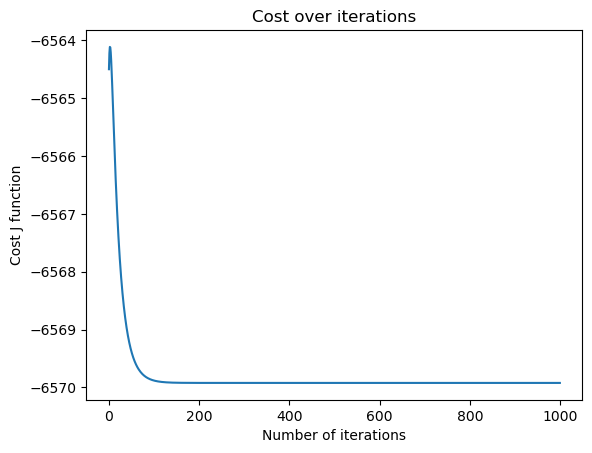

In [844]:
plt.plot(np.arange(nn.J.shape[0]), nn.J)
plt.title("Cost over iterations")
plt.xlabel("Number of iterations")
plt.ylabel("Cost J function")
plt.show()


In [839]:
nn.J[-1:-510:-1]

array([ -5375.79861182,  -6558.14151497, -26076.18150488, -26064.35396091,
       -26052.51727583, -26040.67148474, -26028.81662306, -26016.95272657,
       -26005.07983136, -25993.19797387, -25981.3071908 , -25969.40751919,
       -25957.49899633, -25945.58165979, -25933.65554738, -25921.72069717,
       -25909.77714744, -25897.82493667, -25885.86410356, -25873.89468697,
       -25861.91672592, -25849.93025957, -25837.93532723, -25825.9319683 ,
       -25813.92022227, -25801.90012872, -25789.87172727, -25777.83505759,
       -25765.79015936, -25753.73707224, -25741.6758359 , -25729.60648995,
       -25717.52907394, -25705.44362734, -25693.35018951, -25681.24879969,
       -25669.13949698, -25657.02232031, -25644.89730842, -25632.76449984,
       -25620.62393289, -25608.4756456 , -25596.31967577, -25584.15606088,
       -25571.98483811, -25559.8060443 , -25547.61971592, -25535.42588908,
       -25523.2245995 , -25511.01588246, -25498.7997728 , -25486.57630494,
       -25474.34551277, -